<a href="https://colab.research.google.com/github/thienbaodzt/AI-1/blob/main/flower_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [4]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/flowers', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 251 images belonging to 5 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [8]:
train = model.fit(training_set, epochs = 20, batch_size = 128, verbose = 1)

Epoch 1/20
8/8 [==============================] - 13s 1s/step - loss: 0.3146 - accuracy: 0.9084
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 0.2787 - accuracy: 0.9163
Epoch 3/20
8/8 [==============================] - 12s 1s/step - loss: 0.1886 - accuracy: 0.9482
Epoch 4/20
8/8 [==============================] - 11s 1s/step - loss: 0.1614 - accuracy: 0.9522
Epoch 5/20
8/8 [==============================] - 13s 2s/step - loss: 0.1430 - accuracy: 0.9562
Epoch 6/20
8/8 [==============================] - 11s 1s/step - loss: 0.1068 - accuracy: 0.9681
Epoch 7/20
8/8 [==============================] - 13s 2s/step - loss: 0.0788 - accuracy: 0.9801
Epoch 8/20
8/8 [==============================] - 13s 2s/step - loss: 0.1061 - accuracy: 0.9761
Epoch 9/20
8/8 [==============================] - 13s 2s/step - loss: 0.1318 - accuracy: 0.9602
Epoch 10/20
8/8 [==============================] - 11s 1s/step - loss: 0.2344 - accuracy: 0.9402
Epoch 11/20
8/8 [======================

In [9]:
Score = model.evaluate(training_set, verbose = 0)
print('Ham mat mat', Score[0])
print('Do chinh xac', Score[1])

Ham mat mat 0.05421283096075058
Do chinh xac 0.9760956168174744


In [11]:
model.save('FL.h5')
model_CNN = load_model('FL.h5')

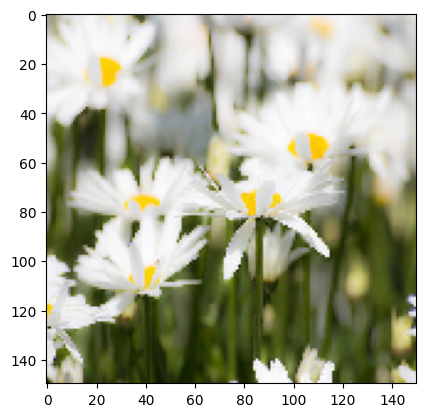

1/1 [==============================] - 0s 51ms/step
daisy


In [15]:
filename = "/content/drive/MyDrive/flowers/daisy/2 (35).jpg"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("daisy")
if(kq == 1):
    print("dandelion")
if(kq == 2):
    print("rose")
if(kq == 3):
    print("sunflower")
if(kq == 4):
    print("tulip")

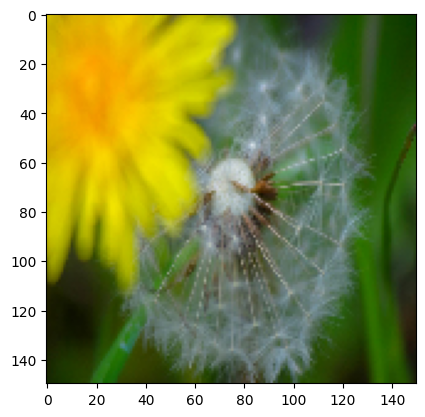

1/1 [==============================] - 0s 48ms/step
dandelion


In [17]:
filename = "/content/drive/MyDrive/flowers/dandelion/1 (31).jpg"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("daisy")
if(kq == 1):
    print("dandelion")
if(kq == 2):
    print("rose")
if(kq == 3):
    print("sunflower")
if(kq == 4):
    print("tulip")

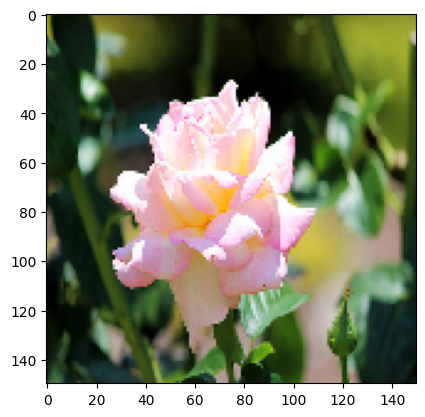

1/1 [==============================] - 0s 52ms/step
rose


In [16]:
filename = "/content/drive/MyDrive/flowers/rose/2 (47).jpg"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("daisy")
if(kq == 1):
    print("dandelion")
if(kq == 2):
    print("rose")
if(kq == 3):
    print("sunflower")
if(kq == 4):
    print("tulip")

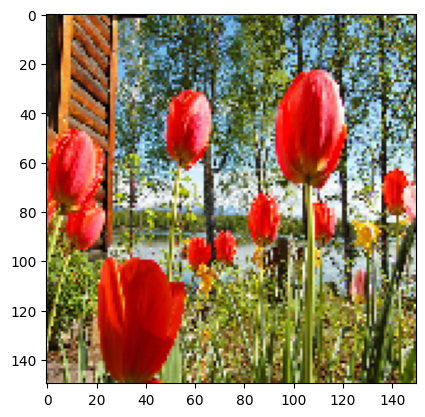

1/1 [==============================] - 0s 36ms/step
tulip


In [18]:
filename = "/content/drive/MyDrive/flowers/tulip/2 (41).jpg"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("daisy")
if(kq == 1):
    print("dandelion")
if(kq == 2):
    print("rose")
if(kq == 3):
    print("sunflower")
if(kq == 4):
    print("tulip")

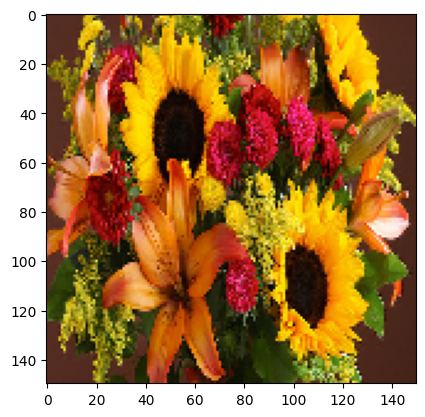

1/1 [==============================] - 0s 32ms/step
sunflower


In [19]:
filename = "/content/drive/MyDrive/flowers/sunflower/2 (48).jpg"
img = load_img(filename,target_size = (150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (model_CNN.predict(img).argmax())
if(kq == 0):
    print("daisy")
if(kq == 1):
    print("dandelion")
if(kq == 2):
    print("rose")
if(kq == 3):
    print("sunflower")
if(kq == 4):
    print("tulip")